In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Setting pathways 
%cd /Users/Soyoung/Downloads
job = pd.read_excel('midterm.xlsx')

/Users/Soyoung/Downloads


## 1. Exploratory Data Analysis

In [3]:
job.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,3,4,1,6,3,3,2,2,2,2


In [4]:
# Checking the types of data
job.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [5]:
# Total number of rows and columns
job.shape

(1470, 31)

In [9]:
# Checking Rows containing duplicate data
duplicate_rows_job = job[job.duplicated()]
print('number of duplicate rows: ', duplicate_rows_job.shape)

number of duplicate rows:  (0, 31)


In [14]:
#Checking Rows containing null value
print(job.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


## 2. High attriction
The head of R&D has asserted that the R&D division and experienced talents who have performed well (as measured by performance reviews and/or salary increases) and have been with the organization for a long period of time have the highest risk of attrition at the company.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### 1) R&D has high attriction rate among all departments?

In [16]:
def bar_chart(feature):
    Attrition = job[job['Attrition']=='Yes'][feature].value_counts()
    Not_Attrition = job[job['Attrition']=='No'][feature].value_counts()
    df = pd.DataFrame([Attrition,Not_Attrition])
    df.index = ['Attrition','Not_Attrition']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

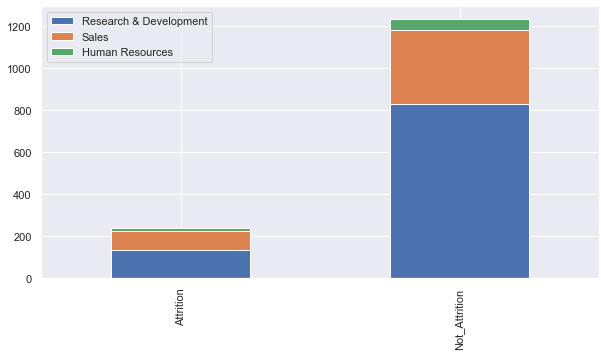

In [17]:
bar_chart('Department')

In [38]:
#Checking attrition rate for each department
df_r_d = job[job["Department"]=='Research & Development']
df_sales = job[job["Department"]=='Sales']
df_h_m = job[job["Department"]=='Human Resources']

R_D_attrition=job[(job["Attrition"]=='Yes')&(job["Department"]=='Research & Development')]
sales_attrition=job[(job["Attrition"]=='Yes')&(job["Department"]=='Sales')]
h_r_attrition=job[(job["Attrition"]=='Yes')&(job["Department"]=='Human Resources')]
print("R&D attrition rate:",'%.2f' %(len(R_D_attrition)/len(df_r_d)*100),"%")
print("Sales attrition rate:",'%.2f' %(len(sales_attrition)/len(df_sales)*100),"%")
print("HR attrition rate:",'%.2f' %(len(h_r_attrition)/len(df_h_m)*100),"%")

R&D attrition rate: 13.84 %
Sales attrition rate: 20.63 %
HR attrition rate: 19.05 %


### 2) Experienced talent has high attriction rate among all departments?
#### a. performance review

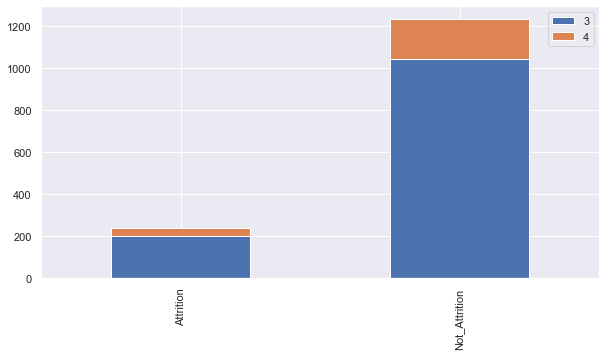

In [39]:
bar_chart('PerformanceRating')

In [40]:
#Checking attrition rate for performance review groups
review3 = job[job["PerformanceRating"]==3]
review4 = job[job["PerformanceRating"]==4]

review3_attrition=job[(job["Attrition"]=='Yes')&(job["PerformanceRating"]==3)]
review4_attrition=job[(job["Attrition"]=='Yes')&(job["PerformanceRating"]==4)]

print("PerformanceRating3 attrition rate:",'%.2f' %(len(review3_attrition)/len(review3)*100),"%")
print("PerformanceRating4 attrition rate:",'%.2f' %(len(review4_attrition)/len(review4)*100),"%")

PerformanceRating3 attrition rate: 16.08 %
PerformanceRating4 attrition rate: 16.37 %


#### b. Salary increase

In [41]:
#Checking attrition rate for percentage of salary increase compared to last year

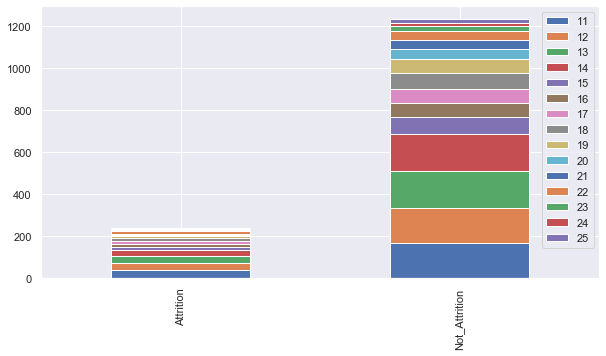

In [42]:
bar_chart('PercentSalaryHike')

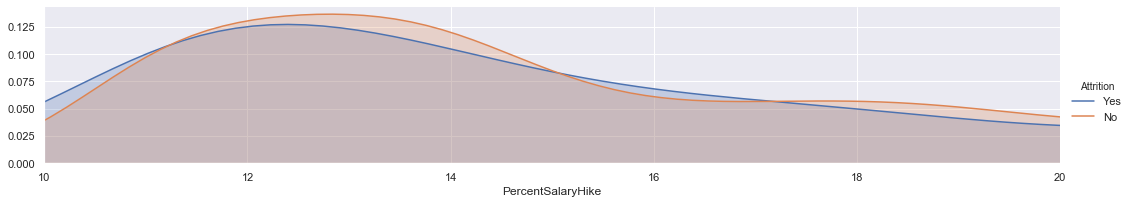

In [44]:
facet = sns.FacetGrid(job, hue="Attrition",aspect=5)
facet.map(sns.kdeplot,'PercentSalaryHike',shade= True)
facet.set(xlim=(0, job['PercentSalaryHike'].max()))
facet.add_legend()
plt.xlim(10, 20)
 
plt.show()

#### c. Long period of time

In [ ]:
#Checking attrition rate for the period of working at the Company 

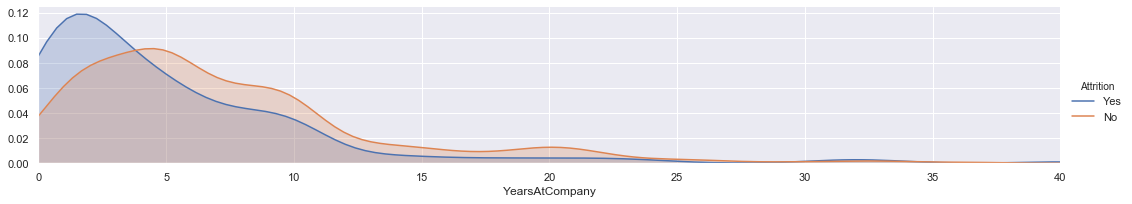

In [47]:
facet = sns.FacetGrid(job, hue="Attrition",aspect=5)
facet.map(sns.kdeplot,'YearsAtCompany',shade= True)
facet.set(xlim=(0, job['YearsAtCompany'].max()))
facet.add_legend()
 
plt.show()

## 3. Key matrics for three divisions
### 1) Demographic
#### a. Gender

In [155]:
#The number of employees for each divisions
job.groupby(['Department']).size()

Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64

In [59]:
def bar_chart_dep(feature):
    R_D = job[job['Department']=='Research & Development'][feature].value_counts()
    Sales = job[job['Department']=='Sales'][feature].value_counts()
    HR = job[job['Department']=='Human Resources'][feature].value_counts()
    df = pd.DataFrame([R_D,Sales,HR])
    df.index = ['R&D','Sales','HR']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

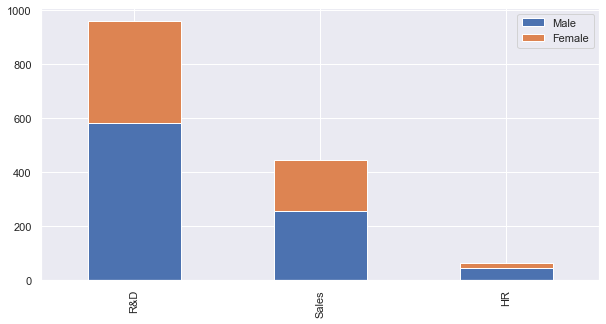

In [60]:
bar_chart_dep('Gender')

In [69]:
def bar_chart_gen(feature):
    Women = job[job['Gender']=='Female'][feature].value_counts()
    Men = job[job['Gender']=='Male'][feature].value_counts()
    df = pd.DataFrame([Women,Men])
    df.index = ['Women','Men']
    df.plot(kind='pie', subplots=True, figsize=(11, 6), autopct='%1.1f%%', startangle=270, fontsize=10)

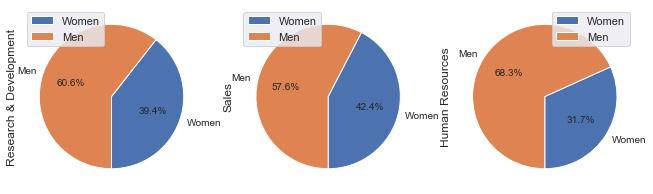

In [70]:
bar_chart_gen('Department')

#### b. Education

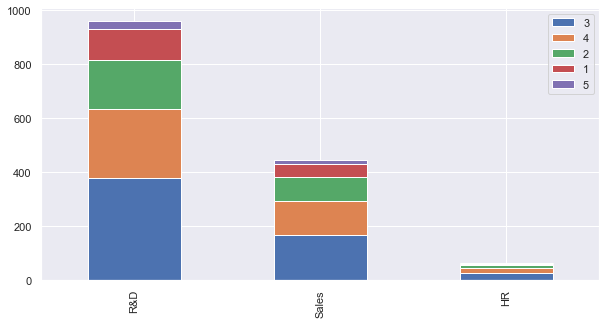

In [73]:
bar_chart_dep('Education')

#### c. Age

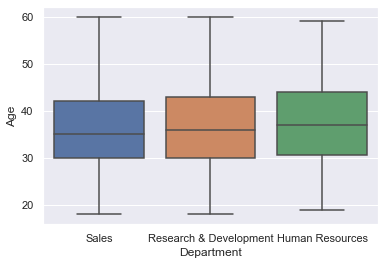

In [78]:
ax = sns.boxplot(x="Department", y="Age", data=job)

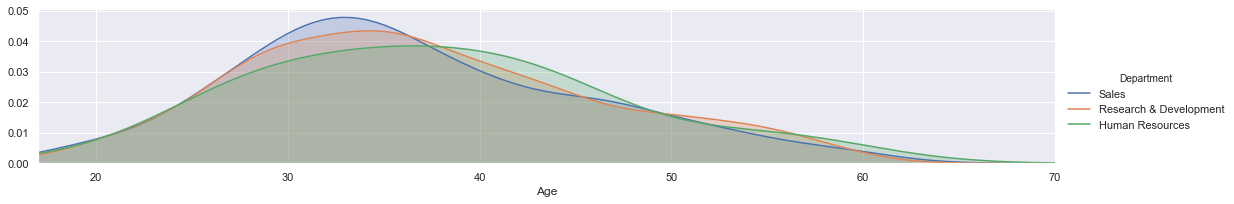

In [158]:
facet = sns.FacetGrid(job, hue="Department",aspect=5)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, job['Age'].max()))
facet.add_legend()
plt.xlim(17, 70)
 
plt.show()

#### d. Martial status

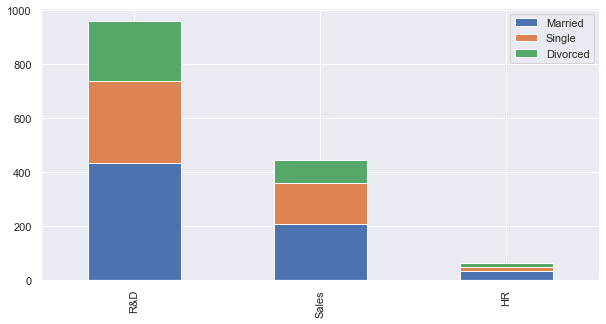

In [79]:
bar_chart_dep('MaritalStatus')

In [82]:
def bar_chart_mar(feature):
    Single = job[job['MaritalStatus']=='Single'][feature].value_counts()
    Married = job[job['MaritalStatus']=='Married'][feature].value_counts()
    Divorced = job[job['MaritalStatus']=='Divorced'][feature].value_counts()
    df = pd.DataFrame([Single,Married,Divorced])
    df.index = ['Single','Married','Divorced']
    df.plot(kind='pie', subplots=True, figsize=(11, 6), autopct='%1.1f%%', startangle=270, fontsize=10)

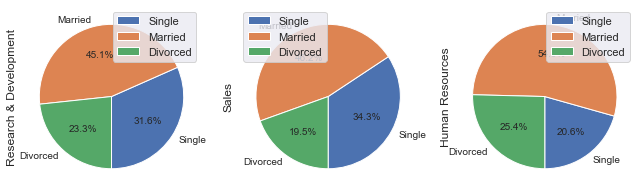

In [83]:
bar_chart_mar('Department')

#### e. Working Distance

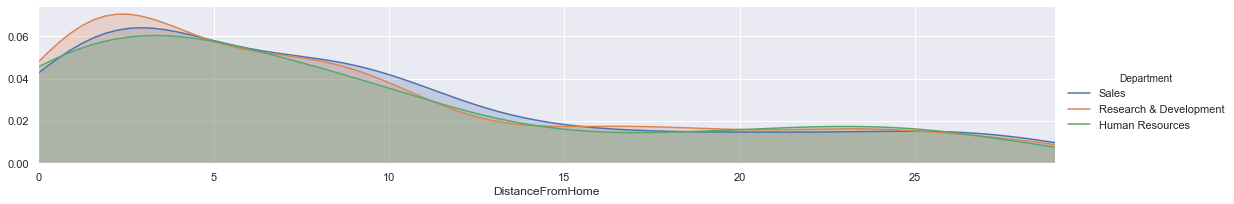

In [85]:
facet = sns.FacetGrid(job, hue="Department",aspect=5)
facet.map(sns.kdeplot,'DistanceFromHome',shade= True)
facet.set(xlim=(0, job['DistanceFromHome'].max()))
facet.add_legend()
 
plt.show()

In [ ]:
###e. overtime?
Sales = job[job["Department"]=='Sales']
RD = job[job["Department"]=='Research & Development']
HR = job[job["Department"]=='Human Resources']

Overtime_sales=job[(job["Department"]=='Sales')&(job["OverTime"]=='Yes')]
Overtime_RD=job[(job["Department"]=='Research & Development')&(job["OverTime"]=='Yes')]
Overtime_HR=job[(job["Department"]=='Human Resources')&(job["OverTime"]=='Yes')]

print("Sales overtime rate:",'%.2f' %(len(Overtime_sales)/len(Sales)*100),"%")
print("R&D overtime rate:",'%.2f' %(len(Overtime_RD)/len(RD)*100),"%")
print("H&R overtime rate:",'%.2f' %(len(Overtime_HR)/len(HR)*100),"%")

In [162]:
###e. overtime?
Sales = job[job["Department"]=='Sales']
RD = job[job["Department"]=='Research & Development']
HR = job[job["Department"]=='Human Resources']

Overtime_sales=job[(job["Department"]=='Sales')&(job["OverTime"]=='Yes')]
Overtime_RD=job[(job["Department"]=='Research & Development')&(job["OverTime"]=='Yes')]
Overtime_HR=job[(job["Department"]=='Human Resources')&(job["OverTime"]=='Yes')]

print("Sales overtime rate:",'%.2f' %(len(Overtime_sales)/len(Sales)*100),"%")
print("R&D overtime rate:",'%.2f' %(len(Overtime_RD)/len(RD)*100),"%")
print("H&R overtime rate:",'%.2f' %(len(Overtime_HR)/len(HR)*100),"%")

Sales overtime rate: 28.70 %
R&D overtime rate: 28.20 %
H&R overtime rate: 26.98 %


### 2) Economic Status
#### a. Montly Income

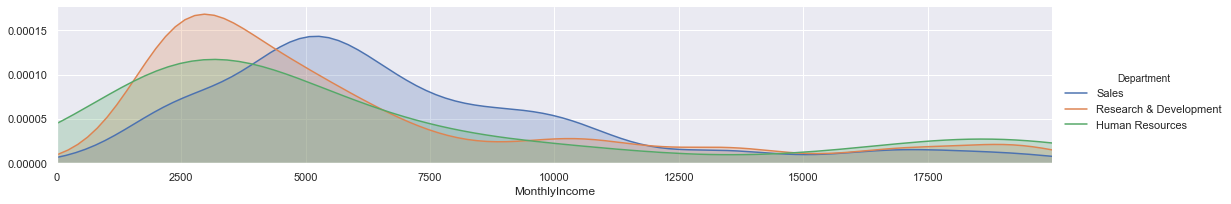

In [87]:
facet = sns.FacetGrid(job, hue="Department",aspect=5)
facet.map(sns.kdeplot,'MonthlyIncome',shade= True)
facet.set(xlim=(0, job['MonthlyIncome'].max()))
facet.add_legend()
 
plt.show()

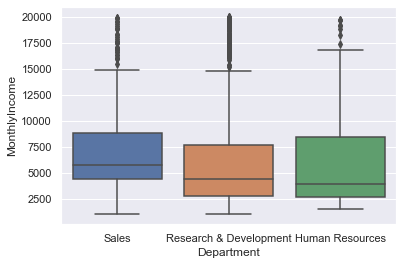

In [86]:
ax = sns.boxplot(x="Department", y="MonthlyIncome", data=job)

In [164]:
#The average monthly salary for each divisions
grouped = job["OverTime"].groupby(job["Department"])
print(round(grouped.mean(),2))

DataError: No numeric types to aggregate

#### b. The increase rate of salary

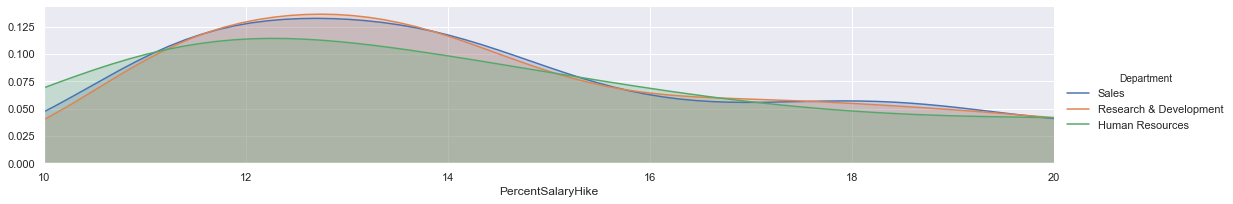

In [90]:
facet = sns.FacetGrid(job, hue="Department",aspect=5)
facet.map(sns.kdeplot,'PercentSalaryHike',shade= True)
facet.set(xlim=(0, job['PercentSalaryHike'].max()))
facet.add_legend()
plt.xlim(10, 20)
 
plt.show()

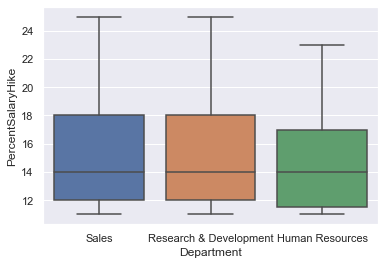

In [91]:
ax = sns.boxplot(x="Department", y="PercentSalaryHike", data=job)

In [159]:
#The average increase rate of salary for each divisions
grouped = job["PercentSalaryHike"].groupby(job["Department"])
print(round(grouped.mean(),2))

Department
Human Resources           14.76
Research & Development    15.29
Sales                     15.10
Name: PercentSalaryHike, dtype: float64 %


## 4. Why people are leaving the company?
There are common reasons good employees quit, according to company leaders and HR professionals who have seen it from those perspectives:
1. Dissatisfaction about the company/job (Overall satisfication/Business trip frequecy/Salary)
2. Feeling over-stressed or over-worked
3. Work-life balance
4. Relationship with colleagues
5. Demographic

In [98]:
#Disatisfication about the Compnay
sales = job[job['Department']=='Sales']

In [140]:
def bar_chart_sales(feature):
    Attrition = sales[sales['Attrition']==1][feature].value_counts()
    Not_Attrition = sales[sales['Attrition']==0][feature].value_counts()
    df = pd.DataFrame([Attrition,Not_Attrition])
    df.index = ['Attrition','Not_Attrition']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

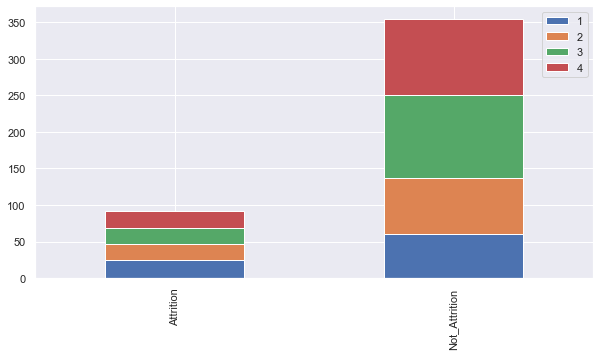

In [102]:
bar_chart_sales("EnvironmentSatisfaction")

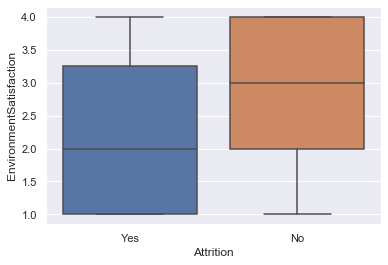

In [104]:
ax = sns.boxplot(x="Attrition", y="EnvironmentSatisfaction", data=sales)

In [107]:
#The summary of Environment satisfaction for sales team
grouped = sales["EnvironmentSatisfaction"].groupby(sales["Attrition"])
print(round(grouped.describe(),2))

           count  mean   std  min  25%  50%   75%  max
Attrition                                             
No         354.0  2.73  1.06  1.0  2.0  3.0  4.00  4.0
Yes         92.0  2.47  1.14  1.0  1.0  2.0  3.25  4.0


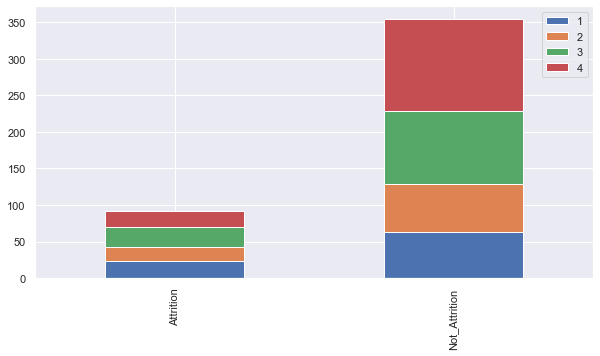

In [105]:
#Disatisfaction about the job
bar_chart_sales("JobSatisfaction")

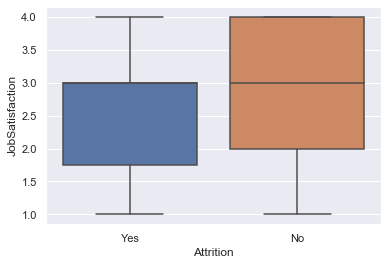

In [106]:
ax = sns.boxplot(x="Attrition", y="JobSatisfaction", data=sales)

In [108]:
#The summary of Job satisfaction for sales team
grouped = sales["JobSatisfaction"].groupby(sales["Attrition"])
print(round(grouped.describe(),2))

           count  mean   std  min   25%  50%  75%  max
Attrition                                             
No         354.0  2.81  1.10  1.0  2.00  3.0  4.0  4.0
Yes         92.0  2.52  1.11  1.0  1.75  3.0  3.0  4.0


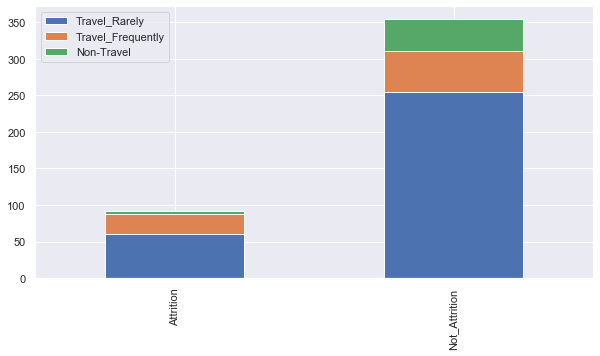

In [109]:
#Business travel frequency
bar_chart_sales("BusinessTravel")

In [120]:
import numpy as np
sales['Attrition'].replace("Yes", 1, inplace=True)
sales['Attrition'].replace("No", 0, inplace=True) 

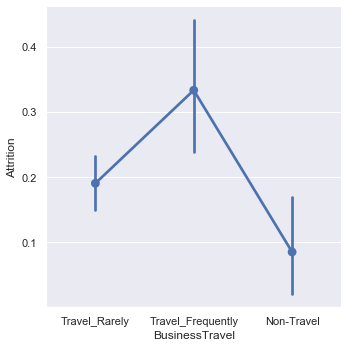

In [121]:
sns.catplot(x="BusinessTravel", y="Attrition", kind="point", data=sales)

In [127]:
#Monthly Salary
sales['Attrition'].replace("1", "Yes", inplace=True)
sales['Attrition'].replace("0", "No", inplace=True) 

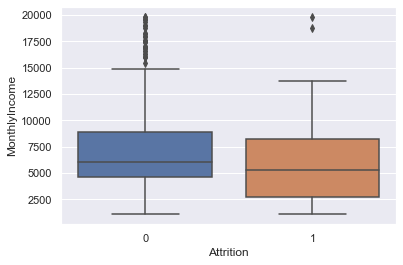

In [131]:
ax = sns.boxplot(x="Attrition", y="MonthlyIncome", data=sales)

In [132]:
#The summary of Salary for sales team
grouped = sales["MonthlyIncome"].groupby(sales["Attrition"])
print(round(grouped.describe(),2))

           count     mean      std     min     25%     50%      75%      max
Attrition                                                                   
0          354.0  7232.24  4084.49  1052.0  4610.5  6073.5  8919.75  19847.0
1           92.0  5908.46  3799.29  1081.0  2749.0  5314.0  8176.75  19845.0


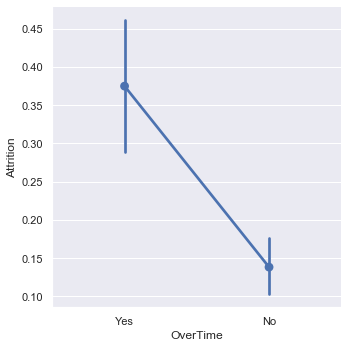

In [134]:
## 2. Feeling over-stressed or over-worked
sns.catplot(x="OverTime", y="Attrition", kind="point", data=sales)

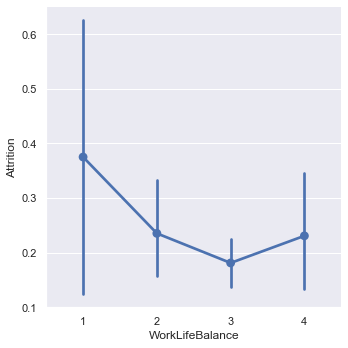

In [143]:
## 3. Work-life balance
sns.catplot(x="WorkLifeBalance", y="Attrition", kind="point", data=sales)

In [144]:
#The summary of WorkLife Balance
grouped = sales["WorkLifeBalance"].groupby(sales["Attrition"])
print(round(grouped.describe(),2))

           count  mean   std  min  25%  50%  75%  max
Attrition                                            
0          354.0  2.84  0.65  1.0  3.0  3.0  3.0  4.0
1           92.0  2.74  0.77  1.0  2.0  3.0  3.0  4.0


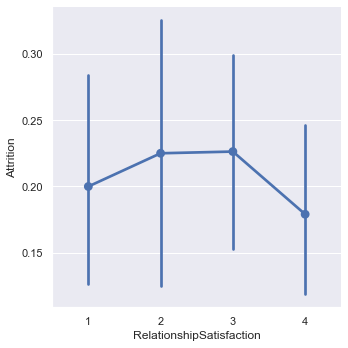

In [145]:
## 4. Relationship with colleagues
sns.catplot(x="RelationshipSatisfaction", y="Attrition", kind="point", data=sales)

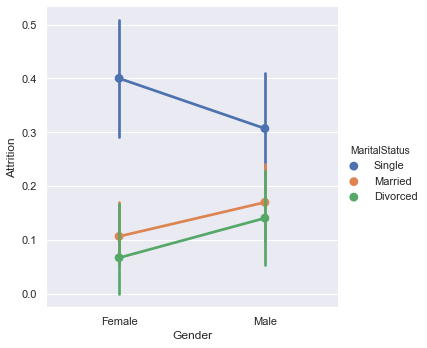

In [147]:
## 5. Demographic
### Gender/Marital status
sns.catplot(x="Gender", y="Attrition", hue="MaritalStatus", kind="point", data=sales)

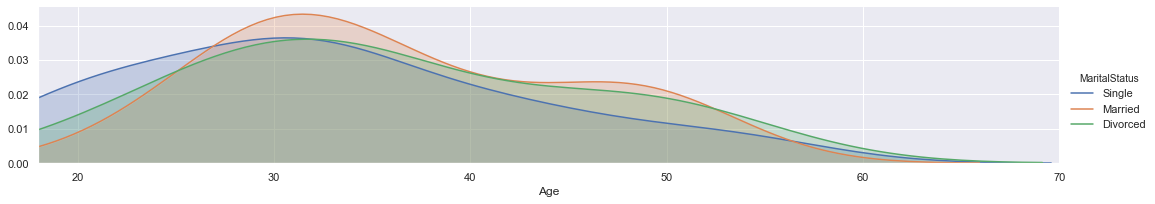

In [151]:
attrition = sales[sales['Attrition']==1]
facet = sns.FacetGrid(attrition, hue="MaritalStatus",aspect=5)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, job['Age'].max()))
facet.add_legend()
plt.xlim(18, 70)
 
plt.show()

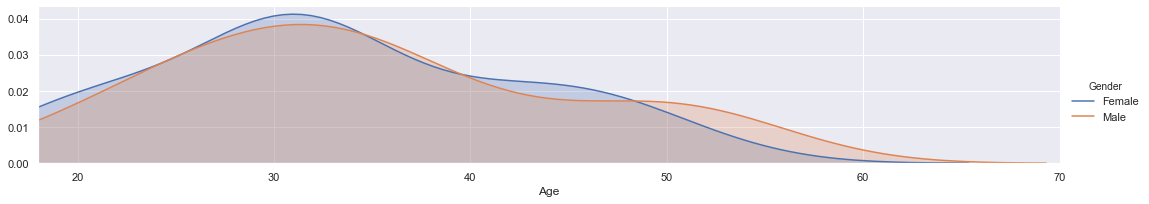

In [152]:
attrition = sales[sales['Attrition']==1]
facet = sns.FacetGrid(attrition, hue="Gender",aspect=5)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, job['Age'].max()))
facet.add_legend()
plt.xlim(18, 70)
 
plt.show()